<a href="https://colab.research.google.com/github/ardianthap/python-stock-analysis/blob/update-google-colab/IHSG%20Stock%20Market%20Analysis-matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center> Data Preparation

### Importing and Organising Dataset

The data was obtained from Yahoo Finance, intially imported using the yfinance package on this notebook

In [1]:
import pandas as pd
import numpy as np

# Visualisation module
import matplotlib.pyplot as plt # Chart plotting

# Importing Colab-Drive integration
from google.colab import drive
drive.mount('/content/drive')

# importing the market data
# Importing on Windows
#data = pd.read_csv('G:/My Drive/PRIBADI/SKILL LEARNING/ANALISIS SAHAM/IHSG_data.csv')

# Importing on MacOS
#data = pd.read_csv('~/Library/CloudStorage/GoogleDrive-nymardiantha@gmail.com//My Drive/PRIBADI/SKILL LEARNING/ANALISIS SAHAM/IHSG_data.csv')

# Importing on Google Colab
data = pd.read_csv('/content/drive/My Drive/PRIBADI/SKILL LEARNING/ANALISIS SAHAM/IHSG_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,12/21/2000,415.086823,415.102997,415.178986,410.938995,414.528015,2059800
1,12/22/2000,416.304810,416.321014,418.815002,412.532013,414.317993,2050800
2,1/2/2001,410.189026,410.204987,415.372009,407.596985,415.372009,843700
3,1/3/2001,405.813202,405.829010,409.601013,402.381989,409.601013,1825000
4,1/4/2001,409.811066,409.826996,409.957001,405.270996,407.269989,3289300


In [3]:
# Checking data completeness
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5898 non-null   object 
 1   Adj Close  5898 non-null   float64
 2   Close      5898 non-null   float64
 3   High       5898 non-null   float64
 4   Low        5898 non-null   float64
 5   Open       5898 non-null   float64
 6   Volume     5898 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 322.7+ KB


The code below converted the Date column's data type into datetime and set it up as the index. Just to be safe, the order was also sorted.

In [4]:
# Converting Date data type
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.sort_values('Date')
    data.set_index('Date', inplace=True)

# Checkpoint: checking date index conversion
print('\n Date index after processing the Date column:')
print(data.head())


 Date index after processing the Date column:
             Adj Close       Close        High         Low        Open  \
Date                                                                     
2000-12-21  415.086823  415.102997  415.178986  410.938995  414.528015   
2000-12-22  416.304810  416.321014  418.815002  412.532013  414.317993   
2001-01-02  410.189026  410.204987  415.372009  407.596985  415.372009   
2001-01-03  405.813202  405.829010  409.601013  402.381989  409.601013   
2001-01-04  409.811066  409.826996  409.957001  405.270996  407.269989   

             Volume  
Date                 
2000-12-21  2059800  
2000-12-22  2050800  
2001-01-02   843700  
2001-01-03  1825000  
2001-01-04  3289300  


### Preparing the calculation and filtering

Creating a new column named '**Daily_Return**' and populating it with the daily percent changes, multiplying it by 100 to normalize the number in their percent (%) form. Any positive (negative) numbers reflected the Indonesia Stock Market Index's **Daily Return**.

In [5]:
# Calculating market's daily return and create a new column within the DataFrame
data['Daily_Return'] = data['Close'].pct_change() * 100
data['Daily_Return'].head()

,Daily_Return
Date,
2000-12-21,NaN
2000-12-22,0.293425
2001-01-02,-1.469065
2001-01-03,-1.066778
2001-01-04,0.985140


In [6]:
# Checking the updated DataFrame
data.tail()

,Adj Close,Close,High,Low,Open,Volume,Daily_Return
Date,,,,,,,
2025-03-26,6472.355957,6472.355957,6489.148926,6312.966797,6314.329102,159762700,3.796525
2025-03-27,6510.620117,6510.620117,6510.620117,6417.240234,6462.596191,121855500,0.591194
2025-04-08,5996.142090,5996.142090,6036.554199,5882.604980,5914.288086,184790800,-7.902136
2025-04-09,5967.987793,5967.987793,6092.412109,5949.601074,5978.440918,150044400,-0.469540
2025-04-10,6254.023926,6254.023926,0.000000,0.000000,0.000000,0,4.792840


The code below prepared the condition and variables that will be used as future reference to filter the daily crash threhold.
<br>
- The variable '**daily_crash_threshold**' set on -6 will act as the threshold when filtering the daily return later; a new column named '**Daily_Crash**' was assigned to rows where **Daily_Return** values are less than or equal to the **daily_crash_threshold**.
<br>
- The cell below further executed the filtering by saving the rows that returned True or having daily return <= crash threshold (**-6%**) to **daily_crashes**


In [7]:
# Define a threshold for a daily crash (drop more than 6%)
daily_crash_threshold = -6
data['Daily_Crash'] = data['Daily_Return'] <= daily_crash_threshold

# Fiter and display rows when daily crashses occurred
daily_crashes = data.loc[data['Daily_Crash'], :]
print(f'List of daily crashes occured\n {daily_crashes}')

List of daily crashes occured
               Adj Close        Close         High          Low         Open  \
Date                                                                          
2002-10-14   337.461853   337.475006   370.915009   334.730988   370.915009   
2004-05-17   668.450989   668.476990   718.578003   665.958984   718.578003   
2006-05-15  1429.486450  1429.541992  1497.031982  1427.050049  1497.031982   
2006-05-22  1308.994141  1309.045044  1397.417969  1304.344971  1395.961060   
2007-08-15  2029.004028  2029.083008  2121.937012  2019.636963  2121.937012   
2008-01-22  2294.434570  2294.523926  2375.882080  2229.819092  2375.882080   
2008-10-06  1648.674805  1648.739014  1766.935059  1634.545044  1766.935059   
2008-10-08  1451.612427  1451.668945  1565.738037  1451.668945  1565.021973   
2008-10-24  1244.815552  1244.864014  1306.766968  1239.291016  1306.766968   
2008-10-27  1166.363770  1166.409058  1185.555054  1157.197998  1185.555054   
2011-09-22  3369.0122

Below, I checked if there is any null values or abnormalities after setting up the filtering so far

In [8]:
# Checkpoint - checking if any rows are empty
print(f'Data shape: {data.shape}')
print(f'Null Close prices: {data["Close"].isna().sum()}')

Data shape: (5898, 8)
Null Close prices: 0


## <center> Plotting the Chart - Daily Crashes and Drawdowns

### Highlighting daily crashes

The cell below plotted the movement of IHSG daily **closing price** along the years, marking the dates where crashes occur filtered on the column **Daily_Crash**.

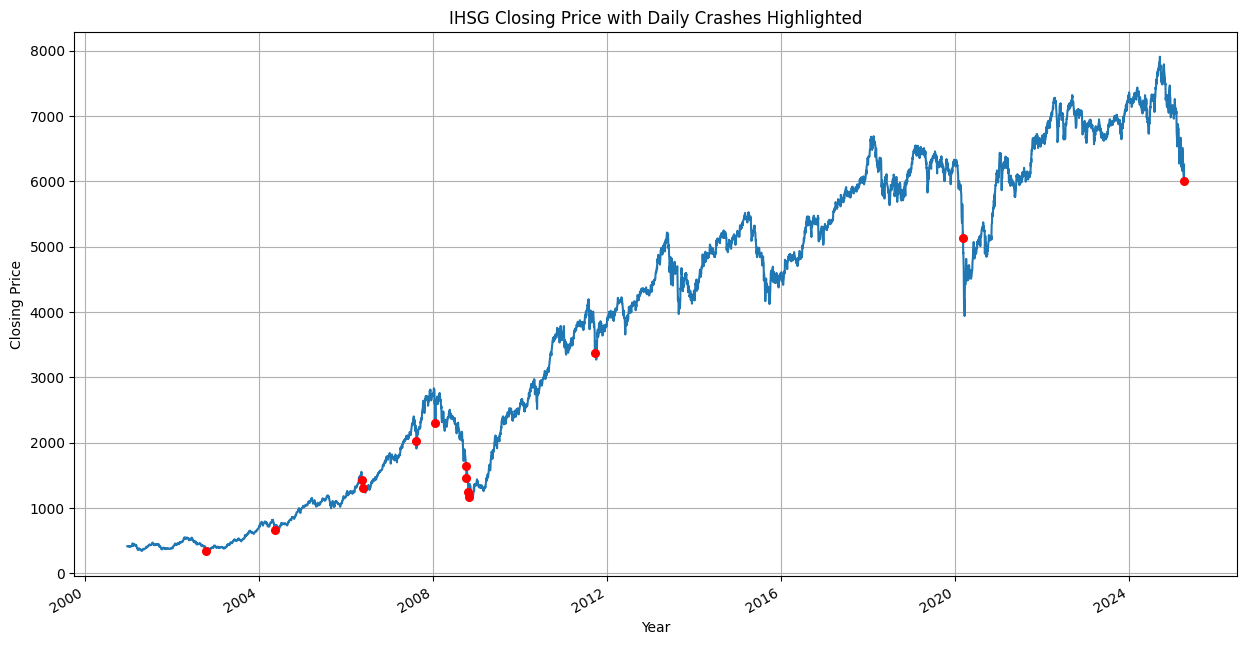

In [9]:
# Ploting Daily Crashes chart
data['Close'].plot(markevery=data['Daily_Crash'], # Give markers to every daily crash points
                   marker='o', ms = 5.5, mec='r', mfc='r',
                  figsize=(15, 8))

# Give label to the chart
plt.title('IHSG Closing Price with Daily Crashes Highlighted')
plt.xlabel('Year')
plt.ylabel('Closing Price')

# Save the figure
plt.savefig('IHSG Closing Price with Daily Crashes Overtime.png', dpi=300)

plt.grid()
plt.show()

A brief look shows that these _daily crashses_ points are not highly indicative of the start of a bearish sentiment. It can be said even, that these points might mark the point of incoming market correction.
<br>

Unfortunately, these daily crash points can only display descriptive historical data points without meaningful insight and additional context. A further elaboration of market stress is imperative.
<br>

A classification whether any particular market stress clustered together can also describe a prolonged bearish sentiment of the Stock Market. Analysts should be able to cross-check the clustered drawdowns as a consensus on the general negative sentiment in the market

### Highlighting Drawdowns - Market Stress

<center> Finding the highest value over time and the percentage drop from it.</center><br>
This was done by sorting for the cumulative maximum and calculating the drawdown (percentage drop from cumulative maximum).
<br>

- **data['Cumulative_Max']** showed the latest cumulative maximum value the market ever reached, the value will change and replaced when there is a higher maximum value.
<br>
- **data['Drawdown']** should show the daily _value change_ (in percentage) compared to the latest cumulative maximum value.

In [10]:
# Calculate cumulative max and drawdown (% drop from the cumulative max)
data['Cumulative_Max'] = data['Close'].cummax()
data['Drawdown'] = (((data['Close'] - data['Cumulative_Max']) / data['Cumulative_Max']) * 100)

# Checkpoint - checking the calculation's result
print(data['Cumulative_Max'].tail())
print(data['Drawdown'].tail())

Date
2025-03-26    7905.390137
2025-03-27    7905.390137
2025-04-08    7905.390137
2025-04-09    7905.390137
2025-04-10    7905.390137
Name: Cumulative_Max, dtype: float64
Date
2025-03-26   -18.127305
2025-03-27   -17.643279
2025-04-08   -24.151219
2025-04-09   -24.507359
2025-04-10   -20.889117
Name: Drawdown, dtype: float64


After defining the **drawdown_threshold** as **-20**, the cell below plotted threshold across the chart, marking the points where any drawdowns surpassed the threshold indicating an apparent market stress.

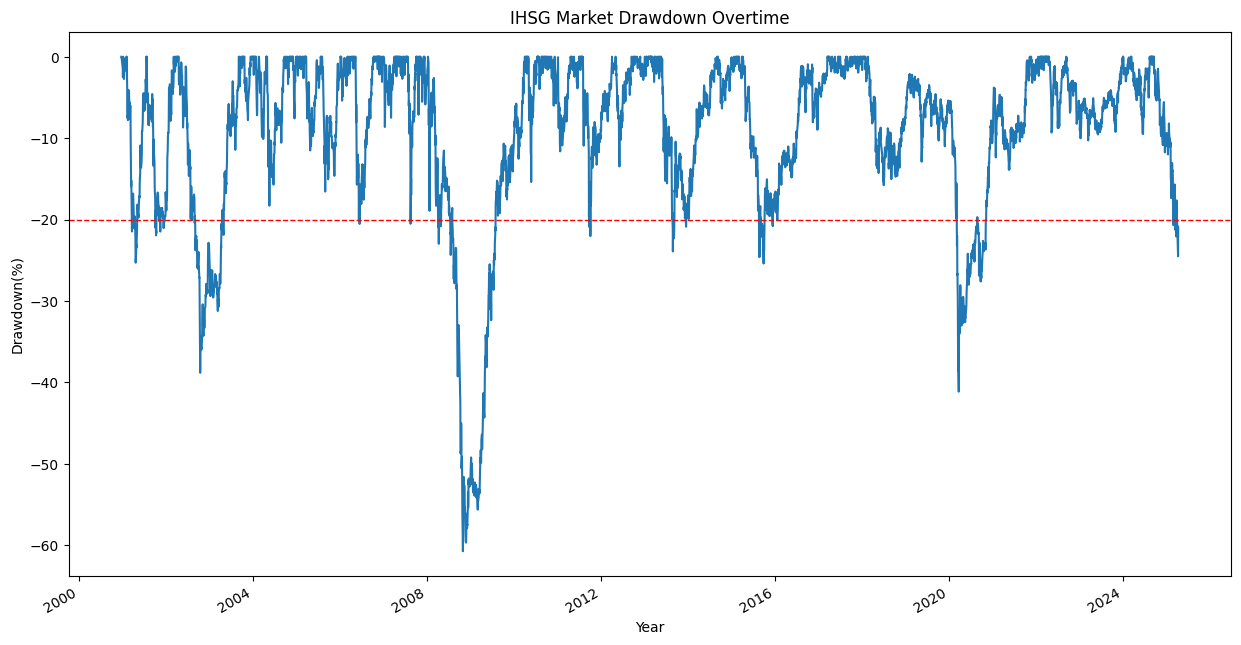

In [11]:
# Highlighting the drawdowns overtime
drawdown_threshold = -20 # Defining threshold mark at 20%

# Plot the chart
data['Drawdown'].plot(figsize=(15, 8))

# Mark the Drawdown Threshold
plt.axhline(y=-20, color='r', linestyle='dashed', linewidth=1)

# Give label to the chart
plt.title('IHSG Market Drawdown Overtime')
plt.xlabel('Year')
plt.ylabel('Drawdown(%)')

# Save the figure
plt.savefig('IHSG Market Drawdown Overtime.png', dpi=300)

plt.show()

Market Drawdowns were consistent with major crashes in global context.<br><br>
1. 2002 Dot-com bubble crash
2. 2008 Stock market crash
3. 2020, March, Covid-19 onset
4. 2025 USA initiation of high Tariff globally


<p>Although in 2025 there was a visible steady decline coinciding with the political unrest in Indonesia at the time, with various harsh critics from the public regarding President Prabowo's stance in his economic policy and response regarding demonstrations/protests that had been happening in diverse forms and topics across the Indonesia. </p>
<br>

Let's identify specifically when and to what magnitude did these major crashes occur. The cell below further stored the values of these drawdown periods in variable **crash_drawdowns**. This variable will be used later to identify clusters of market drawdowns.
<br>
I sorted the **Drawdown's value (%)** in to briefly display time period from the most severe to the least market stress occurred.  

In [12]:
# Displaying specific rows where major Crashes happen

crash_drawdowns = data[data['Drawdown'] <= drawdown_threshold]
print('Dates where Major Crashes happen:\n')
print(crash_drawdowns[['Close', 'Cumulative_Max', 'Drawdown']].dropna().sort_values(by='Drawdown'))

Dates where Major Crashes happen:

                  Close  Cumulative_Max   Drawdown
Date                                              
2008-10-28  1111.390015     2830.262939 -60.731916
2008-10-29  1113.624023     2830.262939 -60.652984
2008-11-24  1141.401001     2830.262939 -59.671556
2008-11-21  1146.276001     2830.262939 -59.499311
2008-11-25  1154.140991     2830.262939 -59.221422
...                 ...             ...        ...
2006-06-15  1241.650024     1553.062012 -20.051484
2013-08-23  4169.827148     5214.976074 -20.041299
2013-08-22  4171.413086     5214.976074 -20.010887
2001-03-19   367.141998      458.951996 -20.004270
2001-04-11   367.156006      458.951996 -20.001218

[660 rows x 3 columns]


## <center> Analyzing Periods of Crashses

### Highlighting Drawdown Clusters

The cell below gathered prolonged drawdown periods as separate clusters. Any drawdowns were defined as in a cluster when they persist at least for three days in a row.

I preparing Clusters DataFrame for easier manipulation as well, this should make it easier to identify periods that have the longest period of market stress.

In [13]:
# Displaying market stress clusters - sorted from the longest
drawdown_dates = data.index[data['Drawdown'] <= drawdown_threshold] # Assign a variable to values below the drawdown threshold.
clusters = [] # Create an empty list to fill with identified clusters later
current_cluster = [] # Create an empty list

# Create a For loop to set the condition and fill the blank list
for date in drawdown_dates:
    if not current_cluster:
        current_cluster.append(date)
    else:
        if (date - current_cluster[-1]).days <= 3:
            current_cluster.append(date)
        else:
            clusters.append(current_cluster)
            current_cluster = [date]
if current_cluster:
    clusters.append(current_cluster)

print('Identifying crash clusters based on drawdown threshold, sorted Descending: \n')
cluster_data = [] # Create an empty list
for idx, cluster in enumerate(clusters): # Populate the list with dictionaries
    cluster_data.append({'Cluster number': f'Cluster {idx+1}',
                         'Cluster period': cluster,
                         'Total days': len(cluster)})

# Convert the list of dictionaries into a Dataframe for easier manipulation
cluster_data = pd.DataFrame(cluster_data)
cluster_data = cluster_data.set_index('Cluster number')

# Sort by number of days to notice the longest drawdown periods
print(cluster_data.sort_values(by='Total days', ascending=False))

Identifying crash clusters based on drawdown threshold, sorted Descending: 

                                                   Cluster period  Total days
Cluster number                                                               
Cluster 35      [2009-04-13 00:00:00, 2009-04-14 00:00:00, 200...          67
Cluster 53      [2020-08-24 00:00:00, 2020-08-25 00:00:00, 202...          46
Cluster 50      [2020-06-02 00:00:00, 2020-06-03 00:00:00, 202...          43
Cluster 13      [2002-10-07 00:00:00, 2002-10-08 00:00:00, 200...          43
Cluster 16      [2003-01-02 00:00:00, 2003-01-03 00:00:00, 200...          41
Cluster 29      [2008-10-13 00:00:00, 2008-10-14 00:00:00, 200...          40
Cluster 17      [2003-03-04 00:00:00, 2003-03-05 00:00:00, 200...          31
Cluster 27      [2008-08-19 00:00:00, 2008-08-20 00:00:00, 200...          29
Cluster 33      [2009-01-27 00:00:00, 2009-01-28 00:00:00, 200...          29
Cluster 12      [2002-09-02 00:00:00, 2002-09-03 00:00:00, 200...

##### The graphs below zoom in on the market stress clusters to reveal more details on different indicators during the clusters:
- Closing price
- Daily return
- Drawdown (%) from the last cumulative peak

#### <center>The Longest Market Stress Cluster</center>

Cluster during 2009-04-13 to 2009-07-17



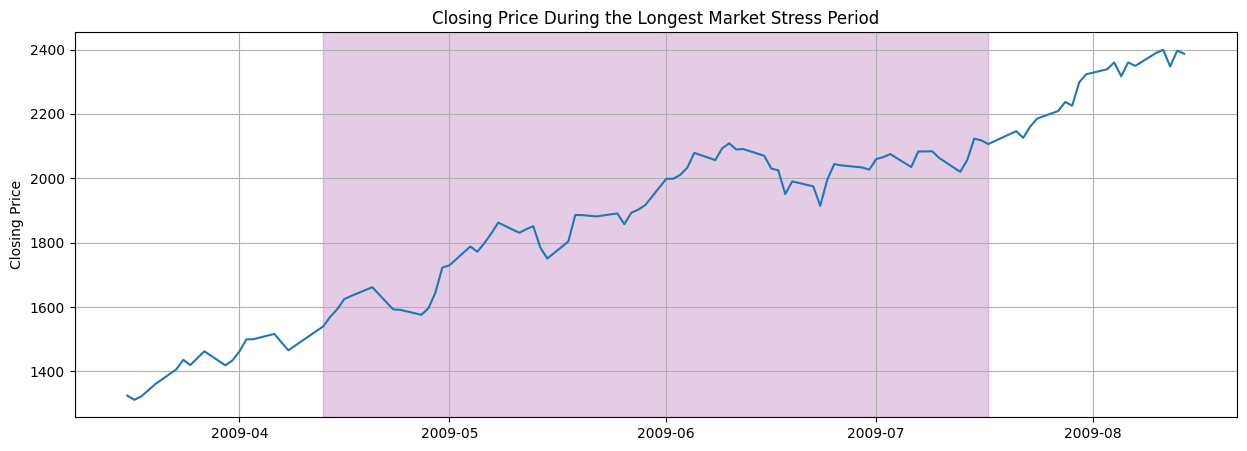

In [14]:
# Displaying the Closing Price during the Longest Market Stress Clusters
cluster_data_sorted = cluster_data.sort_values(by='Total days', ascending=False)

cluster_date = cluster_data_sorted.iloc[0, 0]
cluster_start = cluster_date[0] # Slicing the first value - starting date
cluster_end = cluster_date[-1] # Slicing the last value - ending date
print(f'Cluster during {cluster_start.date()} to {cluster_end.date()}\n')

# Condition to filter out clusters that last for at least a month
zoom_start = cluster_start - pd.Timedelta(days=30) # Define the date range for zoom starting point
zoom_end = cluster_end + pd.Timedelta(days=30) # Define the date range for zoom ending point
zoom_data = data.loc[zoom_start:zoom_end] # Slicing the rows from main dataset by referring the zoom dates

# Set up the figure
plt.figure(figsize=(15, 5)) # Set the figure before plotting
plt.title('Closing Price During the Longest Market Stress Period')
plt.plot(zoom_data.index, zoom_data['Close']) # Set the X and Y axis
plt.axvspan(cluster_start, cluster_end, color='purple', alpha=0.2)
plt.ylabel('Closing Price')
plt.grid()

# Save the figure
plt.savefig('Closing Price During the Longest Market Stress Period.png', dpi=300)

# Display the chart
plt.show() # Display the plot chart

Cluster during 2009-04-13 to 2009-07-17



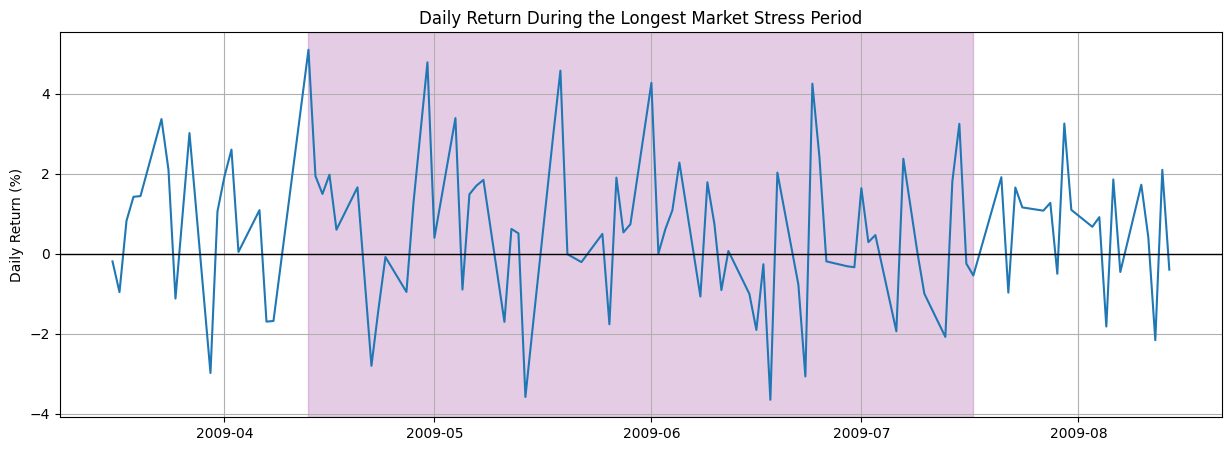

In [15]:
# Displaying Daily Return during the Longest Market Stress Clusters
cluster_date = cluster_data_sorted.iloc[0, 0]
cluster_start = cluster_date[0] # Slicing the first value - starting date
cluster_end = cluster_date[-1] # Slicing the last value - ending date
print(f'Cluster during {cluster_start.date()} to {cluster_end.date()}\n')

# Condition to filter out clusters that last for at least a month
zoom_start = cluster_start - pd.Timedelta(days=30) # Define the date range for zoom starting point
zoom_end = cluster_end + pd.Timedelta(days=30) # Define the date range for zoom ending point
zoom_data = data.loc[zoom_start:zoom_end] # Slicing the rows from main dataset by referring the zoom dates

# Set up the figure
plt.figure(figsize=(15, 5)) # Set the figure before plotting
plt.title('Daily Return During the Longest Market Stress Period')
plt.plot(zoom_data.index, zoom_data['Daily_Return']) # Set the X and Y axis
plt.axvspan(cluster_start, cluster_end, color='purple', alpha=0.2)
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.ylabel('Daily Return (%)')
plt.grid()

# Save the figure
plt.savefig('Daily Returns During the Longest Market Stress Period.png', dpi=300)

# Display the chart
plt.show() # Display the plot chart

Cluster during 2009-04-13 to 2009-07-17



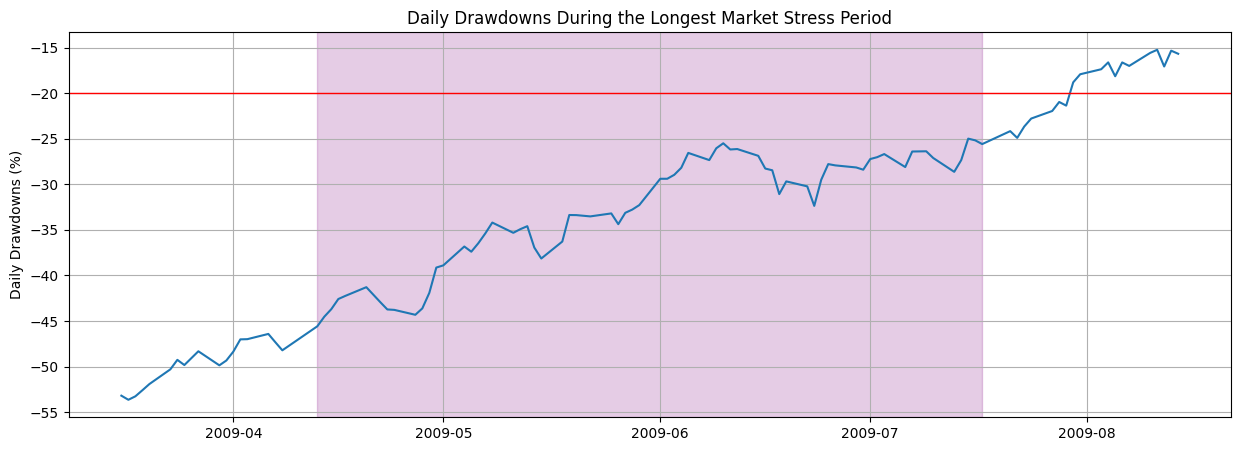

In [16]:
# Displaying Daily Drawdowns during the Longest Market Stress Clusters
cluster_date = cluster_data_sorted.iloc[0, 0]
cluster_start = cluster_date[0] # Slicing the first value - starting date
cluster_end = cluster_date[-1] # Slicing the last value - ending date
print(f'Cluster during {cluster_start.date()} to {cluster_end.date()}\n')

# Condition to filter out clusters that last for at least a month
zoom_start = cluster_start - pd.Timedelta(days=30) # Define the date range for zoom starting point
zoom_end = cluster_end + pd.Timedelta(days=30) # Define the date range for zoom ending point
zoom_data = data.loc[zoom_start:zoom_end] # Slicing the rows from main dataset by referring the zoom dates

# Set up the figure
plt.figure(figsize=(15, 5)) # Set the figure before plotting
plt.title('Daily Drawdowns During the Longest Market Stress Period')
plt.plot(zoom_data.index, zoom_data['Drawdown']) # Set the X and Y axis
plt.axvspan(cluster_start, cluster_end, color='purple', alpha=0.2)
plt.axhline(y=-20, color='red', linestyle='-', linewidth=1)
plt.ylabel('Daily Drawdowns (%)')
plt.grid()

# Save the figure
plt.savefig('Daily Drawdowns During the Longest Market Stress Period.png', dpi=300)

# Display the chart
plt.show() # Display the plot chart

#### <center>The Second Longest Market Stress Cluster </center>

Cluster during 2020-08-24 to 2020-10-27



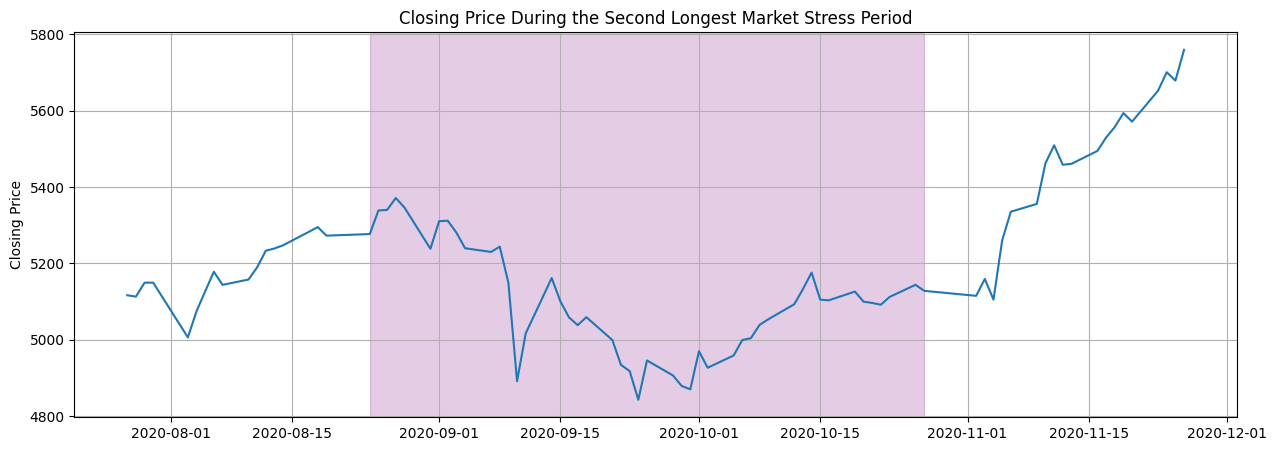

In [17]:
# Displaying the Closing Price during the Second Longest Market Stress Clusters
cluster_date = cluster_data_sorted.iloc[1, 0]
cluster_start = cluster_date[0] # Slicing the first value - starting date
cluster_end = cluster_date[-1] # Slicing the last value - ending date
print(f'Cluster during {cluster_start.date()} to {cluster_end.date()}\n')

# Condition to filter out clusters that last for at least a month
zoom_start = cluster_start - pd.Timedelta(days=30) # Define the date range for zoom starting point
zoom_end = cluster_end + pd.Timedelta(days=30) # Define the date range for zoom ending point
zoom_data = data.loc[zoom_start:zoom_end] # Slicing the rows from main dataset by referring the zoom dates

# Set up the figure
plt.figure(figsize=(15, 5)) # Set the figure before plotting
plt.title('Closing Price During the Second Longest Market Stress Period')
plt.plot(zoom_data.index, zoom_data['Close']) # Set the X and Y axis
plt.axvspan(cluster_start, cluster_end, color='purple', alpha=0.2)
plt.ylabel('Closing Price')
plt.grid()

# Save the figure
plt.savefig('Closing Price During the Second Longest Market Stress Period.png', dpi=300)

# Display the chart
plt.show() # Display the plot chart

Cluster during 2020-08-24 to 2020-10-27



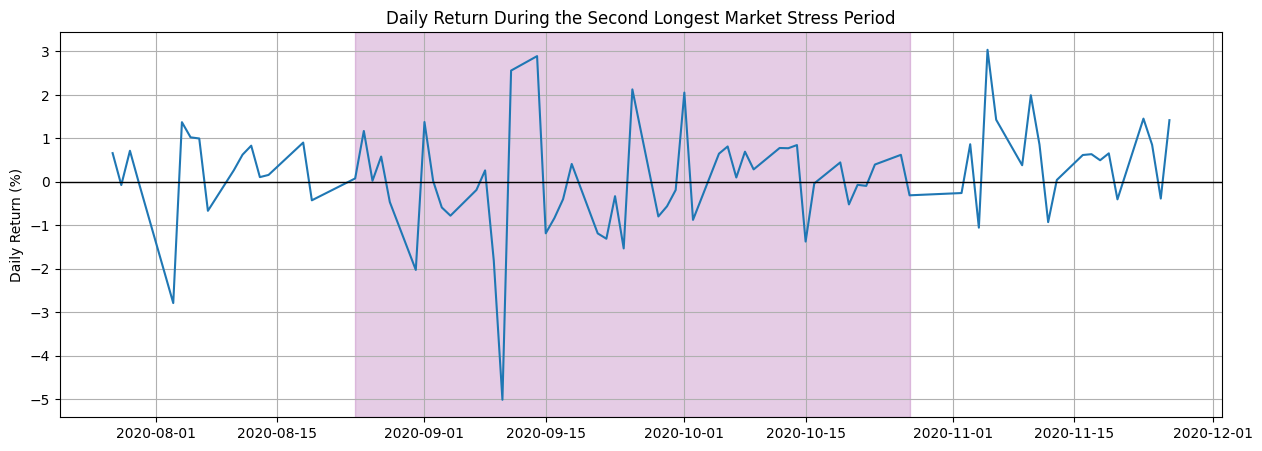

In [18]:
# Displaying Daily Return during the Second Longest Market Stress Clusters
cluster_date = cluster_data_sorted.iloc[1, 0]
cluster_start = cluster_date[0] # Slicing the first value - starting date
cluster_end = cluster_date[-1] # Slicing the last value - ending date
print(f'Cluster during {cluster_start.date()} to {cluster_end.date()}\n')

# Condition to filter out clusters that last for at least a month
zoom_start = cluster_start - pd.Timedelta(days=30) # Define the date range for zoom starting point
zoom_end = cluster_end + pd.Timedelta(days=30) # Define the date range for zoom ending point
zoom_data = data.loc[zoom_start:zoom_end] # Slicing the rows from main dataset by referring the zoom dates

# Set up the figure
plt.figure(figsize=(15, 5)) # Set the figure before plotting
plt.title('Daily Return During the Second Longest Market Stress Period')
plt.plot(zoom_data.index, zoom_data['Daily_Return']) # Set the X and Y axis
plt.axvspan(cluster_start, cluster_end, color='purple', alpha=0.2)
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.ylabel('Daily Return (%)')
plt.grid()

# Save the figure
plt.savefig('Daily Returns During the Second Longest Market Stress Period.png', dpi=300)

# Display the chart
plt.show() # Display the plot chart

Cluster during 2020-08-24 to 2020-10-27



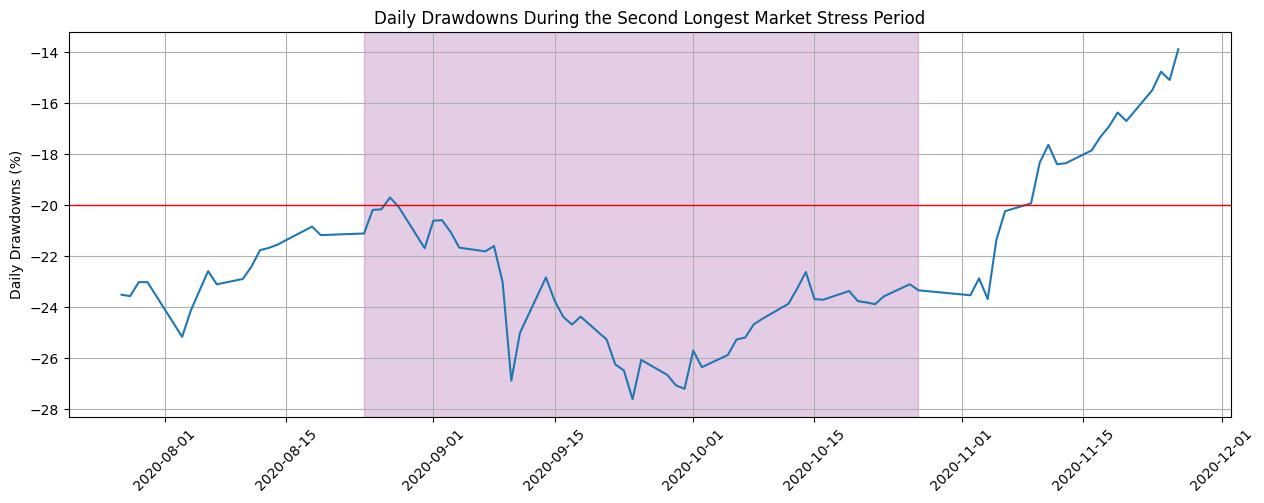

In [19]:
# Displaying Daily Drawdowns during the Second Longest Market Stress Clusters
cluster_date = cluster_data_sorted.iloc[1, 0]
cluster_start = cluster_date[0] # Slicing the first value - starting date
cluster_end = cluster_date[-1] # Slicing the last value - ending date
print(f'Cluster during {cluster_start.date()} to {cluster_end.date()}\n')

# Condition to filter out clusters that last for at least a month
zoom_start = cluster_start - pd.Timedelta(days=30) # Define the date range for zoom starting point
zoom_end = cluster_end + pd.Timedelta(days=30) # Define the date range for zoom ending point
zoom_data = data.loc[zoom_start:zoom_end] # Slicing the rows from main dataset by referring the zoom dates

# Set up the figure
plt.figure(figsize=(15, 5)) # Set the figure before plotting
plt.title('Daily Drawdowns During the Second Longest Market Stress Period')
plt.plot(zoom_data.index, zoom_data['Drawdown']) # Set the X and Y axis
plt.axvspan(cluster_start, cluster_end, color='purple', alpha=0.2)
plt.axhline(y=-20, color='red', linestyle='-', linewidth=1)
plt.xticks(rotation=45) # Rotate the date 45 degrees for better visibility
plt.ylabel('Daily Drawdowns (%)')
plt.grid()

# Save the figure
plt.savefig('Daily Drawdowns During the Second Longest Market Stress Period.png', dpi=300)

# Display the chart
plt.show() # Display the plot chart

#### <center>The Third Longest Market Stress Cluster</center>

Cluster during 2020-06-02 to 2020-07-30



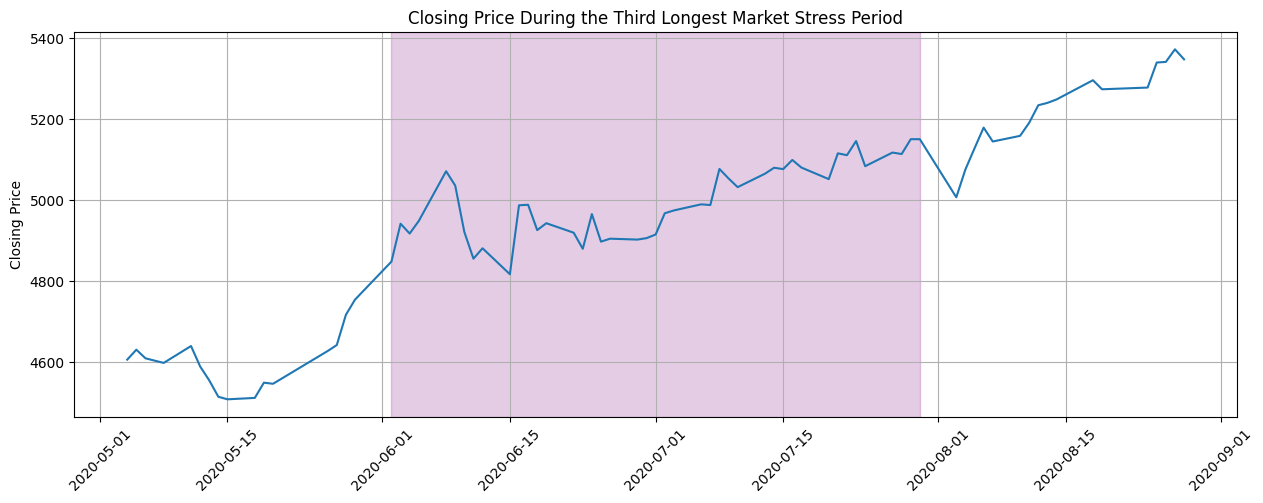

In [20]:
# Displaying the Closing Price during the Third Longest Market Stress Clusters
cluster_date = cluster_data_sorted.iloc[2, 0]
cluster_start = cluster_date[0] # Slicing the first value - starting date
cluster_end = cluster_date[-1] # Slicing the last value - ending date
print(f'Cluster during {cluster_start.date()} to {cluster_end.date()}\n')

# Condition to filter out clusters that last for at least a month
zoom_start = cluster_start - pd.Timedelta(days=30) # Define the date range for zoom starting point
zoom_end = cluster_end + pd.Timedelta(days=30) # Define the date range for zoom ending point
zoom_data = data.loc[zoom_start:zoom_end] # Slicing the rows from main dataset by referring the zoom dates

# Set up the figure
plt.figure(figsize=(15, 5)) # Set the figure before plotting
plt.title('Closing Price During the Third Longest Market Stress Period')
plt.plot(zoom_data.index, zoom_data['Close']) # Set the X and Y axis
plt.axvspan(cluster_start, cluster_end, color='purple', alpha=0.2)
plt.xticks(rotation=45) # Rotate the date 45 degrees for better visibility
plt.ylabel('Closing Price')
plt.grid()

# Save the figure
plt.savefig('Closing Price During the Third Longest Market Stress Period.png', dpi=300)

# Display the chart
plt.show() # Display the plot chart

Cluster during 2020-06-02 to 2020-07-30



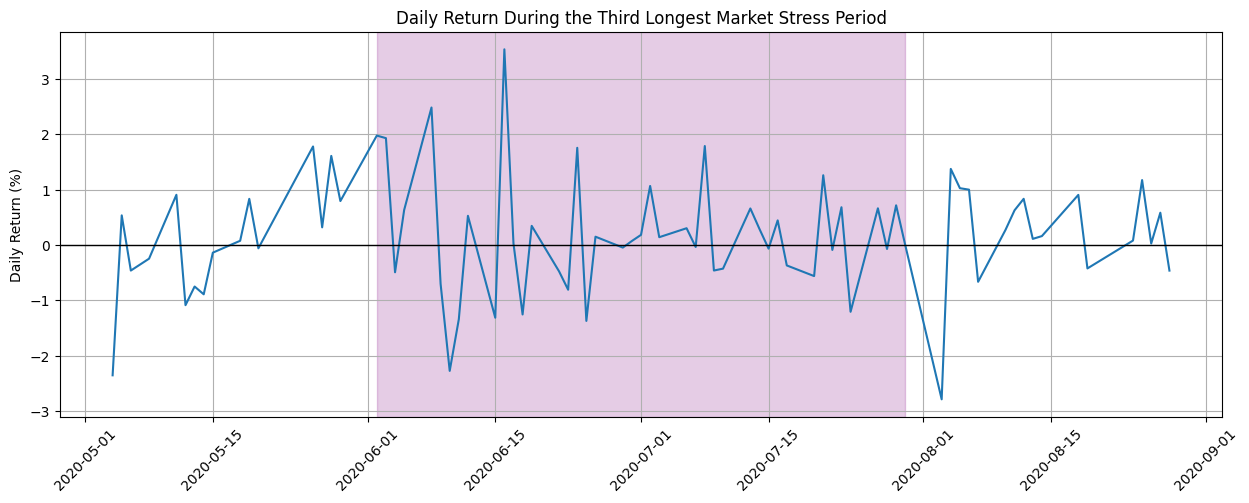

In [21]:
# Displaying Daily Return during the Third Longest Market Stress Clusters
cluster_date = cluster_data_sorted.iloc[2, 0]
cluster_start = cluster_date[0] # Slicing the first value - starting date
cluster_end = cluster_date[-1] # Slicing the last value - ending date
print(f'Cluster during {cluster_start.date()} to {cluster_end.date()}\n')

# Condition to filter out clusters that last for at least a month
zoom_start = cluster_start - pd.Timedelta(days=30) # Define the date range for zoom starting point
zoom_end = cluster_end + pd.Timedelta(days=30) # Define the date range for zoom ending point
zoom_data = data.loc[zoom_start:zoom_end] # Slicing the rows from main dataset by referring the zoom dates

# Set up the figure
plt.figure(figsize=(15, 5)) # Set the figure before plotting
plt.title('Daily Return During the Third Longest Market Stress Period')
plt.plot(zoom_data.index, zoom_data['Daily_Return']) # Set the X and Y axis
plt.axvspan(cluster_start, cluster_end, color='purple', alpha=0.2)
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.xticks(rotation=45) # Rotate the date 45 degrees for better visibility
plt.ylabel('Daily Return (%)')
plt.grid()

# Save the figure
plt.savefig('Daily Returns During the Third Longest Market Stress Period.png', dpi=300)

# Display the chart
plt.show() # Display the plot chart

Cluster during 2020-06-02 to 2020-07-30



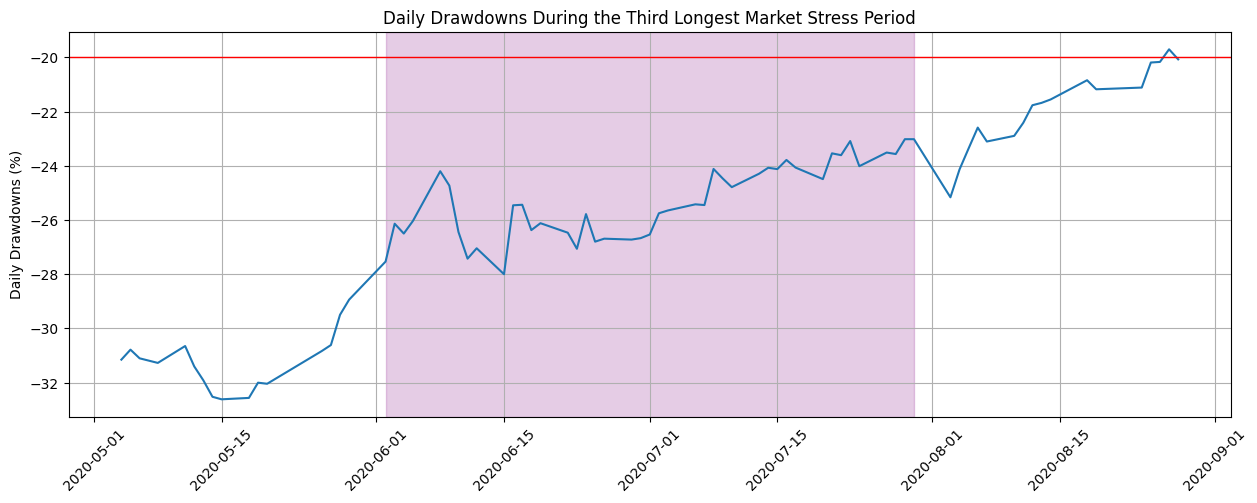

In [22]:
# Displaying Daily Drawdowns during the Third Longest Market Stress Clusters
cluster_date = cluster_data_sorted.iloc[2, 0]
cluster_start = cluster_date[0] # Slicing the first value - starting date
cluster_end = cluster_date[-1] # Slicing the last value - ending date
print(f'Cluster during {cluster_start.date()} to {cluster_end.date()}\n')

# Condition to filter out clusters that last for at least a month
zoom_start = cluster_start - pd.Timedelta(days=30) # Define the date range for zoom starting point
zoom_end = cluster_end + pd.Timedelta(days=30) # Define the date range for zoom ending point
zoom_data = data.loc[zoom_start:zoom_end] # Slicing the rows from main dataset by referring the zoom dates

# Set up the figure
plt.figure(figsize=(15, 5)) # Set the figure before plotting
plt.title('Daily Drawdowns During the Third Longest Market Stress Period')
plt.plot(zoom_data.index, zoom_data['Drawdown']) # Set the X and Y axis
plt.axvspan(cluster_start, cluster_end, color='purple', alpha=0.2)
plt.axhline(y=-20, color='red', linestyle='-', linewidth=1)
plt.xticks(rotation=45) # Rotate the date 45 degrees for better visibility
plt.ylabel('Daily Drawdowns (%)')
plt.grid()

# Save the figure
plt.savefig('Daily Drawdowns During the Third Longest Market Stress Period.png', dpi=300)

# Display the chart
plt.show() # Display the plot chart

#### Analyzing market stress patterns - Key Takeaways

The charts above showed the longest period where major market stress happened. Between these three charts, we can observe a different pattern occuring on the first one. Albeit its major drawdowns, the market price actually is in its process of recovering from the crash, while the other two are in the midst of experiencing tumultuous market sentiment.

From a simple observation, it is obvious that albeit similarities of crash pattern and their subsequent rebound, these market periods experienced a different
<br>

We will observe further on the market return to learn further how the market developed throughout its drawdown clusters.

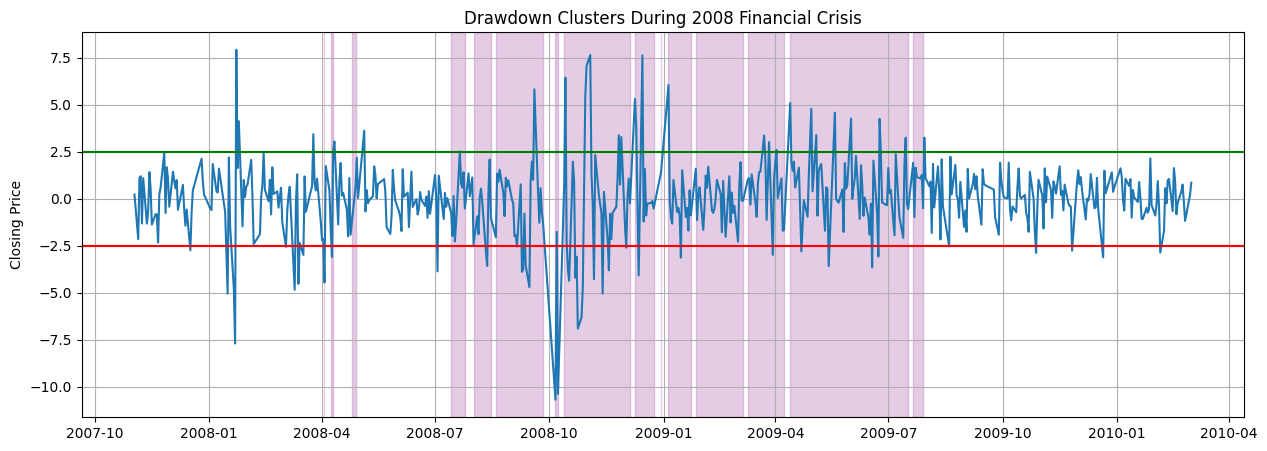

In [23]:
# Highlighting Drawdown Clusters during the 2008 Global Financial Crisis

# Define the period range
start_date = pd.Timestamp('2008-01-01')
end_date = pd.Timestamp('2010-01-01')

# Filtering clusters within the specified time range
clusters_in_range = []
for cluster in cluster_data['Cluster period']:
    cluster_start = cluster[0] # Define the start of looped cluster
    cluster_end = cluster[-1] # Define the end of looped cluster

    # Check if the cluster overlaps with the specified range
    if cluster_start >= start_date and cluster_end <= end_date:
        clusters_in_range.append((cluster_start, cluster_end))

# Condition to filter out clusters that last for at least a month
zoom_start = start_date - pd.Timedelta(days=60) # Define the date range for zoom starting point
zoom_end = end_date + pd.Timedelta(days=60) # Define the date range for zoom ending point
zoom_data = data.loc[zoom_start:zoom_end] # Slicing the rows from main dataset by referring the zoom dates

# Set up the figure
plt.figure(figsize=(15, 5)) # Set the figure before plotting
plt.title('Drawdown Clusters During 2008 Financial Crisis')
plt.plot(zoom_data.index, zoom_data['Daily_Return']) # Set the X and Y axis
plt.axhline(y=2.5, color='green', label='High', linewidth=1.5)
plt.axhline(y=-2.5, color='red', label='Low', linewidth=1.5)

# Highlighting clusters
for cluster_start, cluster_end in clusters_in_range:
    plt.axvspan(cluster_start, cluster_end, color='purple', alpha=0.2)

plt.ylabel('Closing Price')
plt.grid()

## <center> Develop Early Warning Signals

The code below will generate a randomly simulated (synthetic) data for IHSG index **daily returns** in business days. The code employs NumPy's random.seed for reproducibility of simulated data. It will generate numbers randomly following normal distribution pattern. The normal distribution will be generated by defining the simulation's period mean and standard deviation.

10-day moving average was chosen as the mean's and standard deviation timeframe to capture short-term fluctuations, to better represent the model's attempt in detecting warning signals. Thus, the modeling process will be:

1. Calculating the historical 10-day rolling mean and std deviation, notice the most apparent pattern
2. Apply them to the random number generator code
3. Define the early warning model by referring to the historical calculation

The data, however, will need to be regularly updated to gain more accurate simulation of current IHSG's latest simulated numbers.

In [24]:
# Calculate the 10-day rolling Mean and Std Deviation

# Calculate the 10-day rolling mean
data['Rolling_Mean_Return'] = data['Daily_Return'].rolling(window=10).mean()
# Check the mean percentiles
print(f"Daily Return's mean's 5% percentile: {round(data['Rolling_Mean_Return'].quantile(0.05), 3)}%") # Mean's far-left tail

# Calculate the 10-day rolling std. deviation
data['Rolling_Stdev_Return'] = data['Daily_Return'].rolling(window=10).std()
# Check the std deviation percentiles
print(f"Daily Return's standard deviation's 95% percentile: {round(data['Rolling_Stdev_Return'].quantile(0.95), 3)}%") # Stdev's far-right tail

Daily Return's mean's 5% percentile: -0.588%
Daily Return's standard deviation's 95% percentile: 2.229%


In [25]:
# Calculate the typical - most probable mean and volatility (std deviation)

# Normal mean
print(f"Daily Return's normal average trend state : {round(data['Rolling_Mean_Return'].quantile(0.68), 3)}%")

# Normal std deviation
print(f"Daily Return's normal volatility trend state : {round(data['Rolling_Stdev_Return'].quantile(0.68), 3)}%")

Daily Return's normal average trend state : 0.206%
Daily Return's normal volatility trend state : 1.151%


In [26]:
EWS_simulation_assumption = pd.DataFrame({
    'lower_mean_threshold' : [round(data['Rolling_Mean_Return'].quantile(0.05), 3)],
    'upper_volatility_threshold' : [round(data['Rolling_Stdev_Return'].quantile(0.95), 3)],
    'typical_mean' : [round(data['Rolling_Mean_Return'].quantile(0.68), 3)],
    'typical_stdev' : [round(data['Rolling_Stdev_Return'].quantile(0.68), 3)]
                          })

EWS_simulation_assumption

,lower_mean_threshold,upper_volatility_threshold,typical_mean,typical_stdev
0,-0.588,2.229,0.206,1.151


The code above found:

- The lowest short-term (_10-day_) average for Daily Return is: **-0.588%**. Thus this will be used as the threshold for _unusual_ low average return during extreme market conditions.
- The upper bounds of volatility that can be considered as _unusual_ in short-term (_10-day_) standard deviation calculation is: **2.229%**. Thus this will be used as the high volatility threshold during extreme market conditions.

For comparison, the typical 10-day rolling:
- Daily Return average: **0.2%**
- Standard deviation: **1.15**

In [27]:
# Checkpoint - checking latest price in 2025 to start the simulation
print(data.loc['2025-01-01':, 'Close'].tail())

Date
2025-03-26    6472.355957
2025-03-27    6510.620117
2025-04-08    5996.142090
2025-04-09    5967.987793
2025-04-10    6254.023926
Name: Close, dtype: float64


The latest market price available from the Data is: **6254.02**. This will be used as the start of the simulated market price.
Because the data ended at **2025-04-10**, there were approximately **190** business days left in 2025, this number will be used as the reference in generating the frequency of numbers.

In [28]:
# Set up seed for a fixed set of random numbers - Seed 1.
np.random.seed(2)

# Define the dates for the model -> 190 business days starting from April 10, 2025
dates_2025 = pd.bdate_range(start='2025-04-10', end='2025-12-31')

# Preparing the signalling simulation
daily_returns = np.zeros(190) # Store 190 consecutive zeros

# Generate random numbers in Normal Distribution to populate the simulated all year long daily returns
daily_returns[:114] = np.random.normal(loc=0.002, scale=0.0115, size=114) # Slight bullish period - normal
daily_returns[114:152] = np.random.normal(loc=-0.00588, scale=0.0229, size=38) # Simulated crash period
daily_returns[152:] = np.random.normal(loc=0.002, scale=0.0115, size=38) # Slight bullish period - recovery


# Price simulation starts here
prices = [6254.02] # Use the latest price at 2025-04-10
for ret in daily_returns:
    prices.append(prices[-1] * (1 + ret)) # Append simulated compounded growth using synthetic numbers
prices = prices[1:]

# Storing the simulated data
simulated_2025 = pd.DataFrame({
    'Date' : dates_2025,
    'Close' : prices,
    'Daily_Return' : daily_returns
})

# Set the date column as index
simulated_2025.set_index('Date', inplace=True)

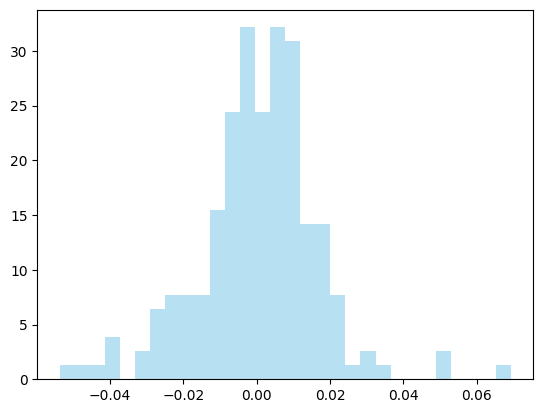

In [29]:
# Checkpoint - checking the normal distribution, in 30 day-monthly bins
plt.hist(daily_returns, bins=30, density=True, alpha=0.6, color='skyblue')
plt.show()

In [30]:
# Compute the rolling mean and volatility for the simulated data
# Calculate the 10-day rolling mean
simulated_2025['Rolling_Mean_Return'] = simulated_2025['Daily_Return'].rolling(window=10).mean()

# Calculate the 10-day rolling std. deviation
simulated_2025['Rolling_Stdev_Return'] = simulated_2025['Daily_Return'].rolling(window=10).std()

# Set up the warning condition
warning_condition = (simulated_2025['Rolling_Mean_Return'] < -0.00588) & (simulated_2025['Rolling_Stdev_Return'] > 0.0229)
simulated_2025['Warning'] = warning_condition # Store in the simulation dataframe

warnings_df = simulated_2025[simulated_2025['Warning']]
print('Simulated early warning signals 2025:')
print(warnings_df[['Close', 'Daily_Return', 'Rolling_Mean_Return', 'Rolling_Stdev_Return']])

Simulated early warning signals 2025:
                  Close  Daily_Return  Rolling_Mean_Return  \
Date                                                         
2025-09-24  6582.878938     -0.039616            -0.008539   
2025-09-25  6390.195456     -0.029270            -0.011293   
2025-09-26  6415.895937      0.004022            -0.010446   
2025-09-29  6330.628785     -0.013290            -0.010938   
2025-09-30  6354.847149      0.003826            -0.010075   
2025-10-01  6433.782115      0.012421            -0.007613   
2025-10-13  5940.968061     -0.030172            -0.006075   
2025-10-15  5926.206590     -0.010077            -0.007941   
2025-10-17  5789.608859     -0.039828            -0.013614   
2025-10-20  5867.771719      0.013501            -0.009400   
2025-10-28  5072.925997     -0.053573            -0.016128   
2025-10-29  5424.105233      0.069226            -0.008198   
2025-10-30  5512.804130      0.016353            -0.008310   

            Rolling_Stdev_Retur

#### Plotting the Early Warning Signals chart

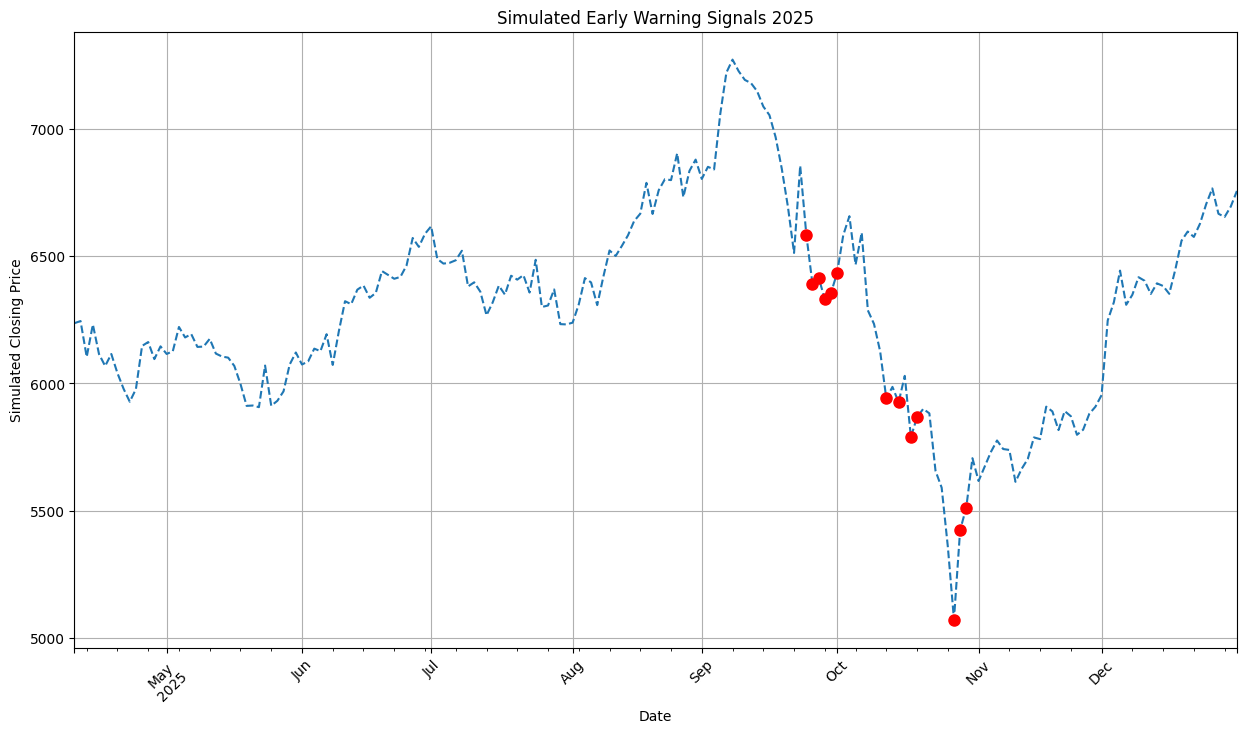

In [31]:
plt.figure(figsize=(15, 5)) # Set up the figure

# Plot the chart
simulated_2025['Close'].plot(markevery=simulated_2025['Warning'],
                   marker='o', ms = 8, mec='r', mfc='r',
                  linestyle='dashed', figsize=(15, 8))

# Assign legends
plt.title('Simulated Early Warning Signals 2025')
plt.xticks(rotation=45) # Rotate the date 45 degrees for better visibility
plt.ylabel('Simulated Closing Price')
plt.grid()

plt.show() # Plot the chart